# Accessing Text Corpora and Lexical Resources

In [56]:
%pprint

Pretty printing has been turned OFF


In [57]:
import nltk

In [58]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

In [59]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [60]:
len(emma)

192427

In [61]:
emma2 = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma2.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

When we defined emma, we invoked the words() function of the gutenberg object in NLTK's corpus package. But since it is cumbersome to type such long names all the time, Python provides another version of the import statement, as follows:

In [62]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

In [63]:
emma = gutenberg.words("austen-emma.txt")
len(emma)

192427

In [64]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)
    
# This program displays three statistics for each text: 
# average word length, 
# average sentence length, 
# and the number of times each vocabulary item appears in the text on average (our lexical diversity score).

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


The previous example also showed how we can access the "raw" text of the book [1], not split up into tokens. The raw() function gives us the contents of the file without any linguistic processing. So, for example, len(gutenberg.raw('blake-poems.txt')) tells us how many letters occur in the text, including the spaces between words. The sents() function divides the text up into its sentences, where each sentence is a list of words:

In [65]:
macbeth_sentences = gutenberg.sents("shakespeare-macbeth.txt")
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [66]:
macbeth_sentences[1116]

['Double', ',', 'double', ',', 'toile', 'and', 'trouble', ';', 'Fire', 'burne', ',', 'and', 'Cauldron', 'bubble']

In [67]:
longest_len = max(len(s) for s in macbeth_sentences)
longest_len

158

In [68]:
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull', 'it', 'stood', ',', 'As', 'two', 'spent', 'Swimmers', ',', 'that', 'doe', 'cling', 'together', ',', 'And', 'choake', 'their', 'Art', ':', 'The', 'mercilesse', 'Macdonwald', '(', 'Worthie', 'to', 'be', 'a', 'Rebell', ',', 'for', 'to', 'that', 'The', 'multiplying', 'Villanies', 'of', 'Nature', 'Doe', 'swarme', 'vpon', 'him', ')', 'from', 'the', 'Westerne', 'Isles', 'Of', 'Kernes', 'and', 'Gallowgrosses', 'is', 'supply', "'", 'd', ',', 'And', 'Fortune', 'on', 'his', 'damned', 'Quarry', 'smiling', ',', 'Shew', "'", 'd', 'like', 'a', 'Rebells', 'Whore', ':', 'but', 'all', "'", 's', 'too', 'weake', ':', 'For', 'braue', 'Macbeth', '(', 'well', 'hee', 'deserues', 'that', 'Name', ')', 'Disdayning', 'Fortune', ',', 'with', 'his', 'brandisht', 'Steele', ',', 'Which', 'smoak', "'", 'd', 'with', 'bloody', 'execution', '(', 'Like', 'Valours', 'Minion', ')', 'caru', "'", 'd', 'out', 'his', 'passage', ',', 'Till', 'hee', 'fac', "'", 'd', 'the', 'Slaue', ':', 'Which', 'neu', "'", 'r', 's

Although Project Gutenberg contains thousands of books, it represents established literature. It is important to consider less formal language as well. NLTK's small collection of web text includes content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews:

In [69]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, ':', webtext.raw(fileid)[:65], "...")

firefox.txt : Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt : SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt : White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt : PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt : 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt : Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


There is also a corpus of instant messaging chat sessions, originally collected by the Naval Postgraduate School for research on automatic detection of Internet predators. The corpus contains over 10,000 posts, anonymized by replacing usernames with generic names of the form "UserNNN", and manually edited to remove any other identifying information. The corpus is organized into 15 files, where each file contains several hundred posts collected on a given date, for an age-specific chatroom (teens, 20s, 30s, 40s, plus a generic adults chatroom). The filename contains the date, chatroom, and number of posts; e.g., 10-19-20s_706posts.xml contains 706 posts gathered from the 20s chat room on 10/19/2006.



In [70]:
from nltk.corpus import nps_chat

chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

In [71]:
from nltk.corpus import brown
brown.categories()

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

In [72]:
brown.words(categories = "news")

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [73]:
brown.words(fileids = ["cg22"])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [74]:
brown.sents(categories=["news", "editorial", "reviews"])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

## Brown Corpus
The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as stylistics. Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre. Remember to import nltk before doing the following:

In [75]:
news_text = brown.words(categories = "news")
news_text

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [76]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
fdist

FreqDist({'the': 6386, ',': 5188, '.': 4030, 'of': 2861, 'and': 2186, 'to': 2144, 'a': 2130, 'in': 2020, 'for': 969, 'that': 829, ...})

In [77]:
modals = ["can", "could", "may", "might", "must", "will"]

for m in modals:
    print(m + ":", fdist[m], end = " ")

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

We need to include end=' ' in order for the print function to put its output on a single line.

Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency distributions. These are presented systematically in 2, where we also unpick the following code line by line. For the moment, you can ignore the details and just concentrate on the output.

In [78]:
brown.categories()

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

In [79]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre))

cfd

<ConditionalFreqDist with 15 conditions>

In [80]:
genres = ["news", "religion", "hobbies", "science_fiction", "romance", "humor"]
modals = ["can", "could", "may", "might", "must", "will"]

In [81]:
cfd.tabulate(conditions = genres, samples = modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Observe that the most frequent modal in the news genre is will, while the most frequent modal in the romance genre is could. Would you have predicted this? The idea that word counts might distinguish genres will be taken up again in chap-data-intensive.

## Reuters Corpus

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with fileid 'test/14826' is a document drawn from the test set. This split is for training and testing algorithms that automatically detect the topic of a document, as we will see in chap-data-intensive.

In [82]:
from nltk.corpus import reuters
reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [83]:
reuters.categories()

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']

Unlike the Brown Corpus, categories in the Reuters corpus overlap with each other, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.

In [84]:
reuters.categories("training/9865")

['barley', 'corn', 'grain', 'wheat']

In [85]:
reuters.categories(["training/9865", "training/9880"])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [86]:
reuters.fileids("barley")

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024', 'test/18263', 'test/18908', 'test/19275', 'test/19668', 'training/10175', 'training/1067', 'training/11208', 'training/11316', 'training/11885', 'training/12428', 'training/13099', 'training/13744', 'training/13795', 'training/13852', 'training/13856', 'training/1652', 'training/1970', 'training/2044', 'training/2171', 'training/2172', 'training/2191', 'training/2217', 'training/2232', 'training/3132', 'training/3324', 'training/395', 'training/4280', 'training/4296', 'training/5', 'training/501', 'training/5467', 'training/5610', 'training/5640', 'training/6626', 'training/7205', 'training/7579', 'training/8213', 'training/8257', 'training/8759', 'training/9865', 'training/9958']

In [87]:
reuters.fileids(["barley", "corn"])

['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106', 'test/15287', 'test/15341', 'test/15618', 'test/15648', 'test/15649', 'test/15676', 'test/15686', 'test/15720', 'test/15728', 'test/15845', 'test/15856', 'test/15860', 'test/15863', 'test/15871', 'test/15875', 'test/15877', 'test/15890', 'test/15904', 'test/15906', 'test/15910', 'test/15911', 'test/15917', 'test/15952', 'test/15999', 'test/16012', 'test/16071', 'test/16099', 'test/16147', 'test/16525', 'test/16624', 'test/16751', 'test/16765', 'test/17503', 'test/17509', 'test/17722', 'test/17767', 'test/17769', 'test/18024', 'test/18035', 'test/18263', 'test/18482', 'test/18614', 'test/18908', 'test/18954', 'test/18973', 'test/19165', 'test/19275', 'test/19668', 'test/19721', 'test/19821', 'test/20018', 'test/20366', 'test/20637', 'test/20645', 'test/20649', 'test/20723', 'test/20763', 'test/21091', 'test/21243', 'test/21493', 'training/10120', 'training/10139', 'training/10172', 'training/10175', 'training/10319',

Similarly, we can specify the words or sentences we want in terms of files or categories. The first handful of words in each of these texts are the titles, which by convention are stored as upper case.

In [88]:
reuters.words("training/9865")[:14]

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have', 'requested', 'licences', 'to', 'export']

In [89]:
reuters.words(categories = "barley")

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [90]:
reuters.words(categories = ["barley", "corn"])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

## Inaugural Address Corpus
In 1, we looked at the Inaugural Address Corpus, but treated it as a single text. The graph in fig-inaugural used "word offset" as one of the axes; this is the numerical index of the word in the corpus, counting from the first word of the first address. However, the corpus is actually a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:

In [91]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [92]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009']

Notice that the year of each text appears in its filename. To get the year out of the filename, we extracted the first four characters, using fileid[:4].

Let's look at how the words America and citizen are used over time. The following code converts the words in the Inaugural corpus to lowercase using w.lower() [1], then checks if they start with either of the "targets" america or citizen using startswith() [1]. Thus it will count words like American's and Citizens. We'll learn about conditional frequency distributions in 2; for now just consider the output, shown in 1.1.

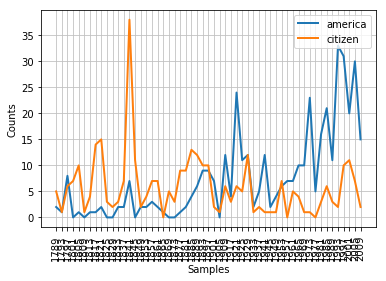

In [93]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ["america", "citizen"]
        if w.lower().startswith(target))

cfd.plot()

## Text Corpus Structure
We have seen a variety of corpus structures so far; these are summarized in 1.3. The simplest kind lacks any structure: it is just a collection of texts. Often, texts are grouped into categories that might correspond to genre, source, author, language, etc. Sometimes these categories overlap, notably in the case of topical categories as a text can be relevant to more than one topic. Occasionally, text collections have temporal structure, news collections being the most common example.

Basic Corpus Functionality defined in NLTK: more documentation can be found using help(nltk.corpus.reader) and by reading the online Corpus HOWTO at  http://nltk.org/howto.

NLTK's corpus readers support efficient access to a variety of corpora, and can be used to work with new corpora. 1.3 lists functionality provided by the corpus readers. We illustrate the difference between some of the corpus access methods below:

In [94]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'

In [95]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]

['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear']

In [97]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

[['I'], ['BUSTER', 'BEAR', 'GOES', 'FISHING'], ['Buster', 'Bear', 'yawned', 'as', 'he', 'lay', 'on', 'his', 'comfortable', 'bed', 'of', 'leaves', 'and', 'watched', 'the', 'first', 'early', 'morning', 'sunbeams', 'creeping', 'through', 'the', 'Green', 'Forest', 'to', 'chase', 'out', 'the', 'Black', 'Shadows', '.'], ['Once', 'more', 'he', 'yawned', ',', 'and', 'slowly', 'got', 'to', 'his', 'feet', 'and', 'shook', 'himself', '.'], ['Then', 'he', 'walked', 'over', 'to', 'a', 'big', 'pine', '-', 'tree', ',', 'stood', 'up', 'on', 'his', 'hind', 'legs', ',', 'reached', 'as', 'high', 'up', 'on', 'the', 'trunk', 'of', 'the', 'tree', 'as', 'he', 'could', ',', 'and', 'scratched', 'the', 'bark', 'with', 'his', 'great', 'claws', '.'], ['After', 'that', 'he', 'yawned', 'until', 'it', 'seemed', 'as', 'if', 'his', 'jaws', 'would', 'crack', ',', 'and', 'then', 'sat', 'down', 'to', 'think', 'what', 'he', 'wanted', 'for', 'breakfast', '.'], ['While', 'he', 'sat', 'there', ',', 'trying', 'to', 'make', 'up

## Loading your own Corpus
If you have your own collection of text files that you would like to access using the above methods, you can easily load them with the help of NLTK's PlaintextCorpusReader. Check the location of your files on your file system; in the following example, we have taken this to be the directory /usr/share/dict. Whatever the location, set this to be the value of corpus_root [1]. The second parameter of the PlaintextCorpusReader initializer [2] can be a list of fileids, like  ['a.txt', 'test/b.txt'], or a pattern that matches all fileids, like '[abc]/.*\.txt' (see 3.4 for information about regular expressions).

In [102]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "datasets/"
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['wiki-industrialengineering.txt']

In [106]:
wordlists.words("wiki-industrialengineering.txt")

['Industrial', 'engineering', 'From', 'Wikipedia', ',', ...]

# Conditional Frequency Distributions
We introduced frequency distributions in 3. We saw that given some list mylist of words or other items, FreqDist(mylist) would compute the number of occurrences of each item in the list. Here we will generalize this idea.

When the texts of a corpus are divided into several categories, by genre, topic, author, etc, we can maintain separate frequency distributions for each category. This will allow us to study systematic differences between the categories. In the previous section we achieved this using NLTK's ConditionalFreqDist data type. A conditional frequency distribution is a collection of frequency distributions, each one for a different "condition". The condition will often be the category of the text. 2.1 depicts a fragment of a conditional frequency distribution having just two conditions, one for news text and one for romance text.

## Conditions and Events
A frequency distribution counts observable events, such as the appearance of words in a text. A conditional frequency distribution needs to pair each event with a condition. So instead of processing a sequence of words [1], we have to process a sequence of pairs [2]:

In [108]:
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

Each pair has the form (condition, event). If we were processing the entire Brown Corpus by genre there would be 15 conditions (one per genre), and 1,161,192 events (one per word).

## Counting Words by Genre
In 1 we saw a conditional frequency distribution where the condition was the section of the Brown Corpus, and for each condition we counted words. Whereas FreqDist() takes a simple list as input, ConditionalFreqDist() takes a list of pairs.

In [109]:
from nltk.corpus import brown

cfd = nltk.ConditionalFreqDist(
                (genre, word)
                for genre in brown.categories()
                for word in brown.words(categories = genre))

Let's break this down, and look at just two genres, news and romance. For each genre [2], we loop over every word in the genre [3], producing pairs consisting of the genre and the word 

In [112]:
genre_word = [(genre, word)
                for genre in ["news", "romance"]
                for word in brown.words(categories = genre)]
        
len(genre_word)

170576

In [113]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [114]:
genre_word[-4: ]

[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]

So, as we can see below, pairs at the beginning of the list genre_word will be of the form ('news', word) [1], while those at the end will be of the form ('romance', word) [2].

We can now use this list of pairs to create a ConditionalFreqDist, and save it in a variable cfd. As usual, we can type the name of the variable to inspect it [1], and verify it has two conditions [2]:

In [115]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

<ConditionalFreqDist with 2 conditions>

In [117]:
cfd.conditions()

['news', 'romance']

Let's access the two conditions, and satisfy ourselves that each is just a frequency distribution:

In [118]:
print(cfd["news"])

<FreqDist with 14394 samples and 100554 outcomes>


In [119]:
print(cfd["romance"])

<FreqDist with 8452 samples and 70022 outcomes>


In [120]:
cfd["romance"].most_common(20)

[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]

In [122]:
cfd["romance"]["of"]

1186

## Plotting and Tabulating Distributions
Apart from combining two or more frequency distributions, and being easy to initialize, a ConditionalFreqDist provides some useful methods for tabulation and plotting.

The plot in 1.1 was based on a conditional frequency distribution reproduced in the code below. The condition is either of the words america or citizen [2], and the counts being plotted are the number of times the word occured in a particular speech. It exploits the fact that the filename for each speech, e.g., 1865-Lincoln.txt contains the year as the first four characters [1]. This code generates the pair ('america', '1865') for every instance of a word whose lowercased form starts with america — such as Americans — in the file 1865-Lincoln.txt.

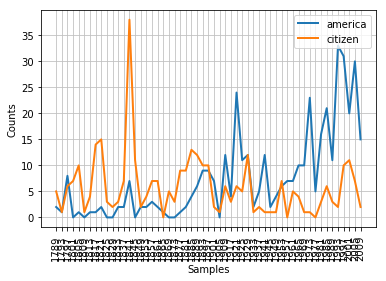

In [124]:
from nltk.corpus import inaugural

cfd = nltk.ConditionalFreqDist(
                (target, fileid[:4])
                for fileid in inaugural.fileids()
                for w in inaugural.words(fileid)
                for target in ["america", "citizen"]
                if w.lower().startswith(target)
            )

cfd.plot()

The plot in 1.2 was also based on a conditional frequency distribution, reproduced below. This time, the condition is the name of the language and the counts being plotted are derived from word lengths [1]. It exploits the fact that the filename for each language is the language name followed by '-Latin1' (the character encoding).

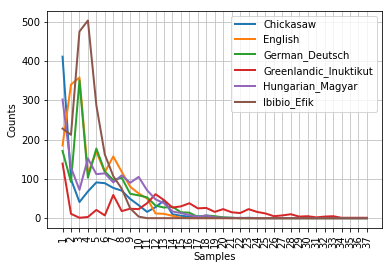

In [125]:
from nltk.corpus import udhr

languages = ["Chickasaw", "English", "German_Deutsch", "Greenlandic_Inuktikut", "Hungarian_Magyar", "Ibibio_Efik"]

cfd = nltk.ConditionalFreqDist(
                (lang, len(word))
                for lang in languages
                for word in udhr.words(lang + "-Latin1")
)

cfd.plot()

In the plot() and tabulate() methods, we can optionally specify which conditions to display with a conditions= parameter. When we omit it, we get all the conditions. Similarly, we can limit the samples to display with a samples= parameter. This makes it possible to load a large quantity of data into a conditional frequency distribution, and then to explore it by plotting or tabulating selected conditions and samples. It also gives us full control over the order of conditions and samples in any displays. For example, we can tabulate the cumulative frequency data just for two languages, and for words less than 10 characters long, as shown below. We interpret the last cell on the top row to mean that 1,638 words of the English text have 9 or fewer letters.

In [130]:
cfd.tabulate(conditions = ["English", "German_Deutsch", "Chickasaw"], 
                            samples = [1, 2, 3, 4, 5, 6, 7, 8 , 9 , 10], cumulative = True)

                  1    2    3    4    5    6    7    8    9   10 
       English  185  525  883  997 1166 1283 1440 1558 1638 1701 
German_Deutsch  171  263  614  717  894 1013 1110 1213 1275 1333 
     Chickasaw  411  510  551  619  710  799  876  946  995 1028 


You may have noticed that the multi-line expressions we have been using with conditional frequency distributions look like list comprehensions, but without the brackets. In general, when we use a list comprehension as a parameter to a function, like set([w.lower() for w in t]), we are permitted to omit the square brackets and just write: set(w.lower() for w in t). (See the discussion of "generator expressions" in 4.2 for more about this.)

## Generating Random Text with Bigrams
We can use a conditional frequency distribution to create a table of bigrams (word pairs). (We introducted bigrams in 3.) The bigrams() function takes a list of words and builds a list of consecutive word pairs. Remember that, in order to see the result and not a cryptic "generator object", we need to use the list() function:

In [133]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
bg = nltk.bigrams(sent)
list(bg)

[('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth'), ('earth', '.')]

In 2.2, we treat each word as a condition, and for each one we effectively create a frequency distribution over the following words. The function generate_model() contains a simple loop to generate text. When we call the function, we choose a word (such as 'living') as our initial context, then once inside the loop, we print the current value of the variable word, and reset word to be the most likely token in that context (using max()); next time through the loop, we use that word as our new context. As you can see by inspecting the output, this simple approach to text generation tends to get stuck in loops; another method would be to randomly choose the next word from among the available words.

In [156]:
def generate_model(cfdist, word, num = 15):
    for i in range(num):
        print(word, end = " ")
        word = cfdist[word].max()

In [135]:
text = nltk.corpus.genesis.words("english-kjv.txt")

In [136]:
bigrams = nltk.bigrams(text)

In [137]:
cfd = nltk.ConditionalFreqDist(bigrams)

In [139]:
cfd["living"]

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [157]:
generate_model(cfd, "living", 30)

living creature that he said , and the land of the land of the land of the land of the land of the land of the land of the land 

The above code obtains all bigrams from the text of the book of Genesis, then constructs a conditional frequency distribution to record which words are most likely to follow a given word; e.g., after the word living, the most likely word is creature; the generate_model() function uses this data, and a seed word, to generate random text.

In [152]:
cfd["earth"]

FreqDist({',': 33, '.': 30, ';': 7, 'after': 6, 'be': 4, 'was': 3, 'bring': 2, 'brought': 2, 'in': 2, 'when': 2, ...})

In [153]:
generate_model(cfd, "earth", 30)

earth , and the land of the land of the land of the land of the land of the land of the land of the land of the land of 

## Functions
Suppose that you work on analyzing text that involves different forms of the same word, and that part of your program needs to work out the plural form of a given singular noun. Suppose it needs to do this work in two places, once when it is processing some texts, and again when it is processing user input.

Rather than repeating the same code several times over, it is more efficient and reliable to localize this work inside a function. A function is just a named block of code that performs some well-defined task, as we saw in 1. A function is usually defined to take some inputs, using special variables known as parameters, and it may produce a result, also known as a return value. We define a function using the keyword def followed by the function name and any input parameters, followed by the body of the function. Here's the function we saw in 1 (including the import statement that is needed for Python 2, in order to make division behave as expected):

In [158]:
from __future__ import division

def lexical_diversity(text):
    return len(text) / len(set(text))

In [159]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [160]:
from nltk.corpus import genesis

kjv = genesis.words("english-kjv.txt")
lexical_diversity(kjv)

0.06230453042623537

In [162]:
def plural(word):
    if word.endswith("y"):
        return word[:-1] + "ies"
    elif word[-1] in "sx" or word[-2: ] in ["sh", "ch"]:
        return word + "es"
    elif word.endswith("an"):
        return word[:-2] + "en"
    else:
        return word + "s"

In [163]:
plural("fairy")

'fairies'

In [165]:
plural("woman")

'women'

## Modules
Over time you will find that you create a variety of useful little text processing functions, and you end up copying them from old programs to new ones. Which file contains the latest version of the function you want to use? It makes life a lot easier if you can collect your work into a single place, and access previously defined functions without making copies.

To do this, save your function(s) in a file called (say) text_proc.py. Now, you can access your work simply by importing it from the file:

In [167]:
from text_proc import plural

plural("wish")

'wishes'

In [168]:
plural("fan")

'fen'

Our plural function obviously has an error, since the plural of fan is fans. Instead of typing in a new version of the function, we can simply edit the existing one. Thus, at every stage, there is only one version of our plural function, and no confusion about which one is being used.

A collection of variable and function definitions in a file is called a Python module. A collection of related modules is called a package. NLTK's code for processing the Brown Corpus is an example of a module, and its collection of code for processing all the different corpora is an example of a package. NLTK itself is a set of packages, sometimes called a library.

## Lexical Resources
A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts. For example, if we have defined a text my_text, then vocab = sorted(set(my_text)) builds the vocabulary of my_text, while word_freq = FreqDist(my_text) counts the frequency of each word in the text. Both of  vocab and word_freq are simple lexical resources. Similarly, a concordance like the one we saw in 1 gives us information about word usage that might help in the preparation of a dictionary. Standard terminology for lexicons is illustrated in 4.1. A lexical entry consists of a headword (also known as a lemma) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called homonyms.


The simplest kind of lexicon is nothing more than a sorted list of words. Sophisticated lexicons include complex structure within and across the individual entries. In this section we'll look at some lexical resources included with NLTK.

## Wordlist Corpora
NLTK includes some corpora that are nothing more than wordlists. The Words Corpus is the /usr/share/dict/words file from Unix, used by some spell checkers. We can use it to find unusual or mis-spelt words in a text corpus, as shown in 4.2.

In [169]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [172]:
unusual_words(nltk.corpus.gutenberg.words("austen-sense.txt"))[ :200]

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions', 'adapted', 'adding', 'additions', 'addressed', 'addresses', 'addressing', 'adhering', 'adieus', 'adjusting', 'administering', 'admirers', 'admires', 'admitting', 'adorned', 'advances', 'advantages', 'affairs', 'affections', 'affects', 'affixed', 'afflictions', 'afforded', 'affording', 'ages', 'agitated', 'agonies', 'ailments', 'aimed', 'alarms', 'alienated', 'alighted', 'alleged', 'allenham', 'allowances', 'allowed', 'allowing', 'alluded', 'alterations', 'altered', 'altering', 'amended', 'amounted', 'amusements', 'ankles', 'annamaria', 'annexed', 'announced', 'announcing', 'annuities', 'annum', 'answered', 'answering', 'answers', 'anticipated', 'anticipating', 'antici

In [173]:
unusual_words(nltk.corpus.nps_chat.words())[:200]

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

Filtering a Text: this program computes the vocabulary of a text, then removes all items that occur in an existing wordlist, leaving just the uncommon or mis-spelt words.

There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [174]:
from nltk.corpus import stopwords
stopwords.words("english")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Let's define a function to compute what fraction of words in a text are not in the stopwords list:

In [175]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words("english")
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [176]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

Thus, with the help of stopwords we filter out over a quarter of the words of the text. Notice that we've combined two different kinds of corpus here, using a lexical resource to filter the content of a text corpus.

A wordlist is useful for solving word puzzles, such as the one in 4.3. Our program iterates through every word and, for each one, checks whether it meets the conditions. It is easy to check obligatory letter [2] and length constraints [1] (and we'll only look for words with six or more letters here). It is trickier to check that candidate solutions only use combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v). The FreqDist comparison method [3] permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.

In [178]:
puzzle_letters = nltk.FreqDist("egivrvonl")
obligatory = "r"
wordlist = nltk.corpus.words.words()

[w for w in wordlist if len(w) >= 4
                    and obligatory in w
                    and nltk.FreqDist(w) <= puzzle_letters]

['enrol', 'ergon', 'genro', 'girl', 'girn', 'giro', 'giver', 'glor', 'glore', 'glover', 'goer', 'goner', 'gore', 'gorlin', 'govern', 'grein', 'grin', 'groin', 'grove', 'grovel', 'ignore', 'inro', 'involver', 'iron', 'irone', 'levir', 'lienor', 'lier', 'liner', 'linger', 'lire', 'liver', 'livor', 'livre', 'loir', 'longer', 'lore', 'lori', 'lorn', 'lover', 'lovering', 'negro', 'nigre', 'noiler', 'noir', 'nori', 'norie', 'ogler', 'ogre', 'oiler', 'oner', 'oriel', 'orle', 'over', 'overling', 'regin', 'region', 'reign', 'rein', 'renvoi', 'reoil', 'revolving', 'rigol', 'rile', 'rine', 'ring', 'ringe', 'ringle', 'rive', 'rivel', 'riven', 'roil', 'role', 'rone', 'rove', 'roving', 'vergi', 'veri', 'vier', 'vigor', 'viner', 'violer', 'vire', 'vireo', 'virl', 'virole', 'viron', 'viver', 'girl', 'iron', 'over', 'ring']

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [179]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [180]:
male_names = names.words("male.txt")
male_names[:100]

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam', 'Adams', 'Addie', 'Adger', 'Aditya', 'Adlai', 'Adnan', 'Adolf', 'Adolfo', 'Adolph', 'Adolphe', 'Adolpho', 'Adolphus', 'Adrian', 'Adrick', 'Adrien', 'Agamemnon', 'Aguinaldo', 'Aguste', 'Agustin', 'Aharon', 'Ahmad', 'Ahmed', 'Ahmet', 'Ajai', 'Ajay', 'Al', 'Alaa', 'Alain', 'Alan', 'Alasdair', 'Alastair', 'Albatros', 'Albert', 'Alberto', 'Albrecht', 'Alden', 'Aldis', 'Aldo', 'Aldric', 'Aldrich', 'Aldus', 'Aldwin', 'Alec', 'Aleck', 'Alejandro', 'Aleks', 'Aleksandrs', 'Alessandro', 'Alex', 'Alexander', 'Alexei', 'Alexis', 'Alf', 'Alfie', 'Alfonse', 'Alfonso', 'Alfonzo', 'Alford', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alic', 'Alister', 'Alix', 'Allah', 'Allan', 'Allen', 'Alley', 'Allie', 'Allin', 'Allyn', 'Alonso', 'Alonzo', 'Aloysius', 'Alphonse', 'Alphonso', 'Alston', 'Alton', 'Alvin']

In [181]:
female_names = names.words("female.txt")
female_names[:100]

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale', 'Abra', 'Acacia', 'Ada', 'Adah', 'Adaline', 'Adara', 'Addie', 'Addis', 'Adel', 'Adela', 'Adelaide', 'Adele', 'Adelice', 'Adelina', 'Adelind', 'Adeline', 'Adella', 'Adelle', 'Adena', 'Adey', 'Adi', 'Adiana', 'Adina', 'Adora', 'Adore', 'Adoree', 'Adorne', 'Adrea', 'Adria', 'Adriaens', 'Adrian', 'Adriana', 'Adriane', 'Adrianna', 'Adrianne', 'Adrien', 'Adriena', 'Adrienne', 'Aeriel', 'Aeriela', 'Aeriell', 'Ag', 'Agace', 'Agata', 'Agatha', 'Agathe', 'Aggi', 'Aggie', 'Aggy', 'Agna', 'Agnella', 'Agnes', 'Agnese', 'Agnesse', 'Agneta', 'Agnola', 'Agretha', 'Aida', 'Aidan', 'Aigneis', 'Aila', 'Aile', 'Ailee', 'Aileen', 'Ailene', 'Ailey', 'Aili', 'Ailina', 'Ailyn', 'Aime', 'Aimee', 'Aimil', 'Aina', 'Aindrea', 'Ainslee', 'Ainsley', 'Ainslie', 'Ajay', 'Alaine', 'Alameda', 'Alana', 'Alanah', 'Alane', 'Alanna', 'Alayne', 'Alberta', 'Albertina', 'Albertine', 'Albina', 'Alecia']

In [182]:
[w for w in male_names if w in female_names]

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

t is well known that names ending in the letter a are almost always female. We can see this and some other patterns in the graph in 4.4, produced by the following code. Remember that name[-1] is the last letter of name.

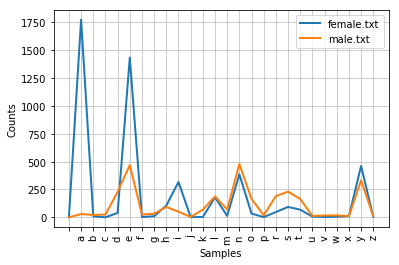

In [183]:
cfd = nltk.ConditionalFreqDist(
                (fileid, name[-1])
                for fileid in names.fileids()
                for name in names.words(fileid)
)

cfd.plot()

## A Pronouncing Dictionary
A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.

In [185]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [186]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


For each word, this lexicon provides a list of phonetic codes — distinct labels for each contrastive sound — known as phones. Observe that fire has two pronunciations (in US English): the one-syllable F AY1 R, and the two-syllable F AY1 ER0. The symbols in the CMU Pronouncing Dictionary are from the Arpabet, described in more detail at http://en.wikipedia.org/wiki/Arpabet

Each entry consists of two parts, and we can process these individually using a more complex version of the for statement. Instead of writing  for entry in entries:, we replace entry with two variable names, word, pron [1]. Now, each time through the loop, word is assigned the first part of the entry, and pron is assigned the second part of the entry:

In [187]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == "P" and ph3 == "T":
            print(word, ph2, end = " ")

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

The above program scans the lexicon looking for entries whose pronunciation consists of three phones [2]. If the condition is true, it assigns the contents of pron to three new variables ph1, ph2 and ph3. Notice the unusual form of the statement which does that work [3].

Here's another example of the same for statement, this time used inside a list comprehension. This program finds all words whose pronunciation ends with a syllable sounding like nicks. You could use this method to find rhyming words.

In [188]:
syllable = ["N", "IH0", "K", "S"]

[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

Notice that the one pronunciation is spelt in several ways: nics, niks, nix, even ntic's with a silent t, for the word atlantic's. Let's look for some other mismatches between pronunciation and writing. Can you summarize the purpose of the following examples and explain how they work?

In [189]:
[w for w, pron in entries if pron[-1] == "M" and w[-1] == "n"]

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [190]:
sorted(set(w[:2] for w, pron in entries if pron[0] == "N" and w[0] != "n"))

['gn', 'kn', 'mn', 'pn']

The phones contain digits to represent primary stress (1), secondary stress (2) and no stress (0). As our final example, we define a function to extract the stress digits and then scan our lexicon to find words having a particular stress pattern.

In [191]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [194]:
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:100]

['abbreviated', 'abbreviated', 'abbreviating', 'accelerated', 'accelerating', 'accelerator', 'accelerators', 'accentuated', 'accentuating', 'accommodated', 'accommodating', 'accommodative', 'accumulated', 'accumulating', 'accumulative', 'accumulator', 'accumulators', 'accusatory', 'adenovirus', 'adjudicated', 'adjudicating', 'administrating', 'administrative', 'administrator', "administrators'", "administrator's", 'administrators', 'adulterated', 'adventurism', 'adventurism', 'affiliated', 'affiliated', "affiliated's", 'affiliating', 'alleviated', 'alleviated', 'alleviating', 'alliteration', 'alliterative', 'amalgamated', "amalgamated's", 'amalgamating', 'ameliorated', 'ameridata', 'amoxicillin', 'anachronism', 'anachronisms', 'annihilated', 'annihilating', 'antagonism', 'antagonisms', 'antagonizing', 'anticipated', 'anticipated', 'anticipating', 'apologizes', 'apologizing', 'apothecary', 'appreciated', 'appreciating', 'appreciative', 'appropriated', 'appropriating', 'appropriator', 'a

In [195]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']][:100]

['abbreviation', 'abbreviations', 'abomination', 'abortifacient', 'abortifacients', 'academicians', 'accommodation', 'accommodations', 'accreditation', 'accreditations', 'accumulation', 'accumulations', 'acetylcholine', 'acetylcholine', 'adjudication', 'administration', "administration's", 'administrations', "administrations'", 'aduliadae', 'adulteration', 'affiliation', 'affiliations', 'aficionados', 'agglomeration', 'ahasuerus', 'ajinomoto', 'alleviation', 'amalgamation', 'ambrosiano', 'amelioration', 'americana', "americana's", 'americanas', 'americano', 'americanos', 'anachronistic', 'anencephalic', 'annihilation', 'antagonistic', 'anticipation', 'anticipations', 'apocalyptic', 'apologetic', 'apotheosis', 'appreciation', 'appropriation', 'appropriations', 'approximation', 'approximations', 'aristocratic', 'arunachalam', 'assassination', 'assassinations', 'assimilation', 'association', 'association', 'associations', "association's", 'associations', 'authentication', 'authentications

We can use a conditional frequency distribution to help us find minimally-contrasting sets of words. Here we find all the p-words consisting of three sounds [2], and group them according to their first and last sounds [1].

In [196]:
p3 = [(pron[0] + '-' + pron[2], word)
            for (word, pron) in entries
            if pron[0] == "P" and len(pron) == 3
     ]

In [197]:
cfd = nltk.ConditionalFreqDist(p3)

In [198]:
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words: sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[: 70] + "...")

P-CH [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-K [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-L [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-N [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-P [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-R [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-S [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-T [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-UW1 [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...
P-Z [ The Adventures of Buster Bear by Thornton W . Burgess 1920 ] I BUSTE...


## Comparative Wordlists
Another example of a tabular lexicon is the comparative wordlist. NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages. The languages are identified using an ISO 639 two-letter code.

In [199]:
from nltk.corpus import swadesh
swadesh.fileids()

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']

In [200]:
swadesh.words("en")

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

We can access cognate words from multiple languages using the entries() method, specifying a list of languages. With one further step we can convert this into a simple dictionary (we'll learn about dict() in 3).

In [202]:
fr2en = swadesh.entries(["fr", "en"])
fr2en[:20]

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few')]

In [203]:
translate = dict(fr2en)

In [204]:
translate["chien"]

'dog'

In [206]:
translate["jeter"]

'throw'

We can make our simple translator more useful by adding other source languages. Let's get the German-English and Spanish-English pairs, convert each to a dictionary using dict(), then update our original translate dictionary with these additional mappings:

In [210]:
de2en = swadesh.entries(["de", "en"]) # german - english
es2en = swadesh.entries(["es", "en"]) # spanish - english

In [208]:
translate.update(dict(de2en))

In [211]:
translate.update(dict(es2en))

In [212]:
translate["Hund"]

'dog'

In [213]:
translate["perro"]

'dog'

In [220]:
languages = ["en", "de", "nl", "es", "fr", "pt", "la"]

for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


## Shoebox and Toolbox Lexicons
Perhaps the single most popular tool used by linguists for managing data is Toolbox, previously known as Shoebox since it replaces the field linguist's traditional shoebox full of file cards. Toolbox is freely downloadable from http://www.sil.org/computing/toolbox/.

A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.

Here is a dictionary for the Rotokas language. We see just the first entry, for the word kaa meaning "to gag":

In [225]:
from nltk.corpus import toolbox

toolbox.entries("rotokas.dic")[1]

('kaa', [('ps', 'V'), ('pt', 'B'), ('ge', 'strangle'), ('tkp', 'pasim nek'), ('arg', 'O'), ('vx', '2'), ('dt', '07/Oct/2006'), ('ex', 'Rera rauroro rera kaarevoi.'), ('xp', 'Em i holim pas em na nekim em.'), ('xe', 'He is holding him and strangling him.'), ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'), ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'), ('xe', "They strangled the man's neck with rope because he was very stubborn and arrogant."), ('ex', 'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'), ('xp', 'Ol i pasim nek bilong man long rop. Olsem na em i no pulim win olsem na em i dai.'), ('xe', "They strangled the man's neck with a rope. And he couldn't breathe and he died.")])

Entries consist of a series of attribute-value pairs, like ('ps', 'V') to indicate that the part-of-speech is 'V' (verb), and ('ge', 'gag') to indicate that the gloss-into-English is 'gag'. The last three pairs contain an example sentence in Rotokas and its translations into Tok Pisin and English.

The loose structure of Toolbox files makes it hard for us to do much more with them at this stage. XML provides a powerful way to process this kind of corpus and we will return to this topic in 11..

Note

The Rotokas language is spoken on the island of Bougainville, Papua New Guinea. This lexicon was contributed to NLTK by Stuart Robinson. Rotokas is notable for having an inventory of just 12 phonemes (contrastive sounds), http://en.wikipedia.org/wiki/Rotokas_language

# WordNet
WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.

## Senses and Synonyms
Consider the sentence in (1a). If we replace the word motorcar in (1a) by automobile, to get (1b), the meaning of the sentence stays pretty much the same:

(1)		
a.		Benz is credited with the invention of the motorcar.

b.		Benz is credited with the invention of the automobile.


Since everything else in the sentence has remained unchanged, we can conclude that the words motorcar and automobile have the same meaning, i.e. they are synonyms. We can explore these words with the help of WordNet:

In [226]:
from nltk.corpus import wordnet as wn

wn.synsets("motorcar")

[Synset('car.n.01')]

Thus, motorcar has just one possible meaning and it is identified as car.n.01, the first noun sense of car. The entity car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas"):

In [227]:
wn.synset("car.n.01").lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. Synsets also come with a prose definition and some example sentences:

In [228]:
wn.synset("car.n.01").definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [229]:
wn.synset("car.n.01").examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on. This pairing of a synset with a word is called a lemma. We can get all the lemmas for a given synset [1], look up a particular lemma [2], get the synset corresponding to a lemma [3], and get the "name" of a lemma [4]:

In [230]:
wn.synset("car.n.01").lemmas()

[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]

In [231]:
wn.lemma("car.n.01.automobile")

Lemma('car.n.01.automobile')

In [232]:
wn.lemma("car.n.01.automobile").synset()

Synset('car.n.01')

In [233]:
wn.lemma("car.n.01.automobile").name()

'automobile'

Unlike the word motorcar, which is unambiguous and has one synset, the word car is ambiguous, having five synsets:

In [234]:
wn.synsets("car")

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]

In [235]:
for synset in wn.synsets("car"):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


For convenience, we can access all the lemmas involving the word car as follows.

In [237]:
wn.lemmas("car")

[Lemma('car.n.01.car'), Lemma('car.n.02.car'), Lemma('car.n.03.car'), Lemma('car.n.04.car'), Lemma('cable_car.n.01.car')]

## The WordNet Hierarchy
WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event — these are called unique beginners or root synsets. Others, such as gas guzzler and hatchback, are much more specific. A small portion of a concept hierarchy is illustrated in 5.1.

Fragment of WordNet Concept Hierarchy: nodes correspond to synsets; edges indicate the hypernym/hyponym relation, i.e. the relation between superordinate and subordinate concepts.

WordNet makes it easy to navigate between concepts. For example, given a concept like motorcar, we can look at the concepts that are more specific; the (immediate) hyponyms.

In [238]:
motorcar = wn.synset("car.n.01")
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [239]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car', 'taxi', 'taxicab', 'tourer', 'touring_car', 'two-seater', 'used-car', 'waggon', 'wagon']

We can also navigate up the hierarchy by visiting hypernyms. Some words have multiple paths, because they can be classified in more than one way. There are two paths between car.n.01 and entity.n.01 because wheeled_vehicle.n.01 can be classified as both a vehicle and a container.

In [240]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [241]:
paths = motorcar.hypernym_paths()

In [242]:
len(paths)

2

In [243]:
[synset.name() for synset in paths[0]]

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']

In [244]:
[synset.name() for synset in paths[1]]

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']

We can get the most general hypernyms (or root hypernyms) of a synset as follows:

In [245]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## More Lexical Relations
Hypernyms and hyponyms are called lexical relations because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (meronyms) or to the things they are contained in (holonyms). For example, the parts of a tree are its trunk, crown, and so on; the part_meronyms(). The substance a tree is made of includes heartwood and sapwood; the  substance_meronyms(). A collection of trees forms a forest; the member_holonyms():

In [246]:
wn.synset("tree.n.01").part_meronyms()

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]

In [247]:
wn.synset("tree.n.01").substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [248]:
wn.synset("tree.n.01").member_holonyms()

[Synset('forest.n.01')]

To see just how intricate things can get, consider the word mint, which has several closely-related senses. We can see that mint.n.04 is part of mint.n.02 and the substance from which mint.n.05 is made.

In [249]:
for synset in wn.synsets("mint", wn.NOUN):
    print(synset.name() + ":", synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [250]:
wn.synset("mint.n.04").part_holonyms()

[Synset('mint.n.02')]

In [251]:
wn.synset("mint.n.04").substance_holonyms()

[Synset('mint.n.05')]

There are also relationships between verbs. For example, the act of walking involves the act of stepping, so walking entails stepping. Some verbs have multiple entailments:

In [252]:
wn.synset("walk.v.01").entailments()

[Synset('step.v.01')]

In [253]:
wn.synset("eat.v.01").entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [254]:
wn.synset("tease.v.03").entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

Some lexical relationships hold between lemmas, e.g., antonymy:

In [255]:
wn.lemma("supply.n.02.supply").antonyms()

[Lemma('demand.n.02.demand')]

In [256]:
wn.lemma("rush.v.01.rush").antonyms()

[Lemma('linger.v.04.linger')]

In [257]:
wn.lemma("horizontal.a.01.horizontal").antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [258]:
wn.lemma("staccato.r.01.staccato").antonyms()

[Lemma('legato.r.01.legato')]

##  Semantic Similarity
We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like vehicle will match documents containing specific terms like limousine.

Recall that each synset has one or more hypernym paths that link it to a root hypernym such as entity.n.01. Two synsets linked to the same root may have several hypernyms in common (cf 5.1). If two synsets share a very specific hypernym — one that is low down in the hypernym hierarchy — they must be closely related.

In [262]:
right = wn.synset("right_whale.n.01")
orca = wn.synset("orca.n.01")
minke = wn.synset("minke_whale.n.01")
tortoise = wn.synset("tortoise.n.01")
novel = wn.synset("novel.n.01")

In [264]:
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [265]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [266]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [267]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

Of course we know that whale is very specific (and baleen whale even more so), while vertebrate is more general and entity is completely general. We can quantify this concept of generality by looking up the depth of each synset:

In [268]:
wn.synset("baleen_whale.n.01").min_depth()

14

In [269]:
wn.synset("whale.n.02").min_depth()

13

In [270]:
wn.synset("vertebrate.n.01").min_depth()

8

In [271]:
wn.synset("entity.n.01").min_depth()

0

Similarity measures have been defined over the collection of WordNet synsets which incorporate the above insight. For example, path_similarity assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return 1. Consider the following similarity scores, relating right whale to minke whale, orca, tortoise, and novel. Although the numbers won't mean much, they decrease as we move away from the semantic space of sea creatures to inanimate objects.

In [272]:
right.path_similarity(minke)

0.25

In [274]:
right.path_similarity(orca)

0.16666666666666666

In [275]:
right.path_similarity(tortoise)

0.07692307692307693

In [276]:
right.path_similarity(novel)

0.043478260869565216

## Summary
* A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, nltk.corpus.brown.
* Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
* A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
* Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an import statement.
* Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.
* Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this:  x.funct(y), e.g., word.isalpha().
* To find out about some variable v, type help(v) in the Python interactive interpreter to read the help entry for this kind of object.
* WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.
* Some functions are not available by default, but must be accessed using Python's import statement.